In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
dataset = pd.read_csv('churn_prediction.csv')
dataset.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,28382.0,15143.508667,8746.454456,1.00,7557.2500,15150.500,22706.7500,30301.00
vintage,28382.0,2091.144105,272.676775,73.00,1958.0000,2154.000,2292.0000,2476.00
age,28382.0,48.208336,17.807163,1.00,36.0000,46.000,60.0000,90.00
dependents,25919.0,0.347236,0.997661,0.00,0.0000,0.000,0.0000,52.00
city,27579.0,796.109576,432.872102,0.00,409.0000,834.000,1096.0000,1649.00
customer_nw_category,28382.0,2.225530,0.660443,1.00,2.0000,2.000,3.0000,3.00
branch_code,28382.0,925.975019,937.799129,1.00,176.0000,572.000,1440.0000,4782.00
current_balance,28382.0,7380.551804,42598.711923,-5503.96,1784.4700,3281.255,6635.8200,5905904.03
previous_month_end_balance,28382.0,7495.770548,42529.345225,-3149.57,1906.0000,3379.915,6656.5350,5740438.63
average_monthly_balance_prevQ,28382.0,7496.779856,41726.218776,1428.69,2180.9450,3542.865,6666.8875,5700289.57


In [5]:
dataset.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

<ipython-input-6-e35a15e03095>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


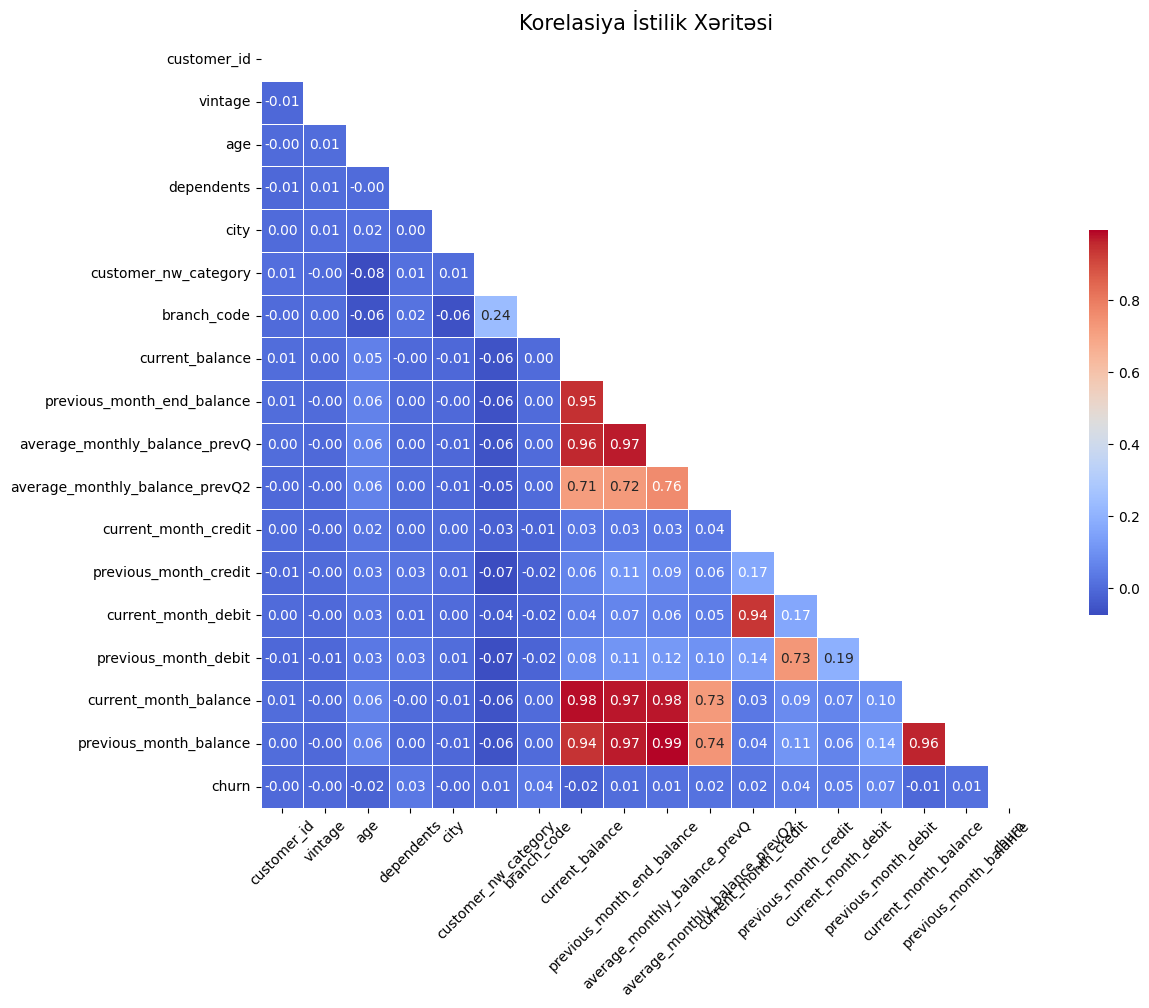

In [6]:

corr_matrix = dataset.corr()

fig, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

tri_corr_matrix = corr_matrix.loc[mask.any(axis=1), mask.any(axis=0)]

sns.heatmap(tri_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Korelasiya İstilik Xəritəsi', fontsize=15)
plt.show()


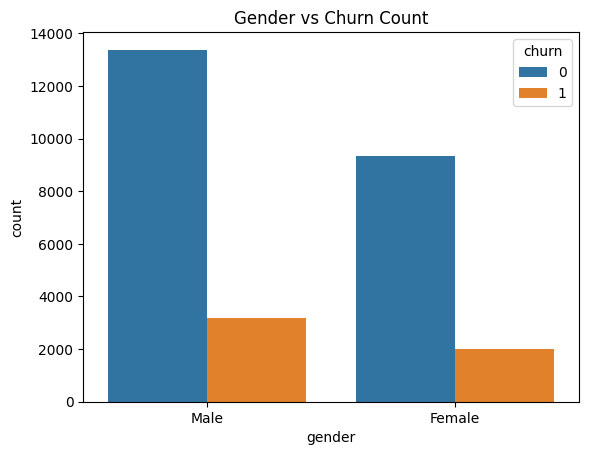

In [7]:

sns.countplot(x='gender', hue='churn', data=dataset)
plt.title('Gender vs Churn Count')
plt.show()


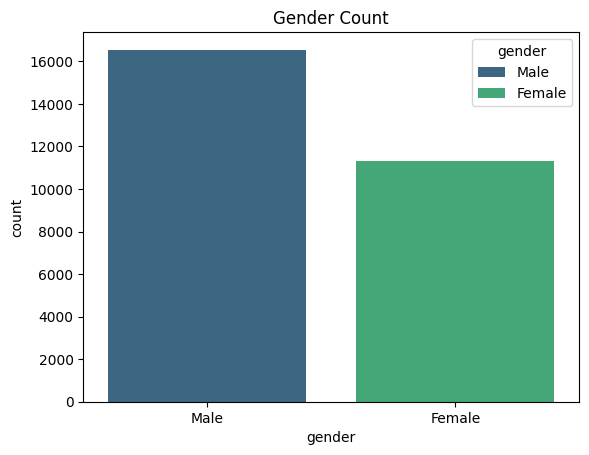

In [8]:

sns.countplot(x='gender', hue='gender', data=dataset, palette='viridis')
plt.title('Gender Count')
plt.show()


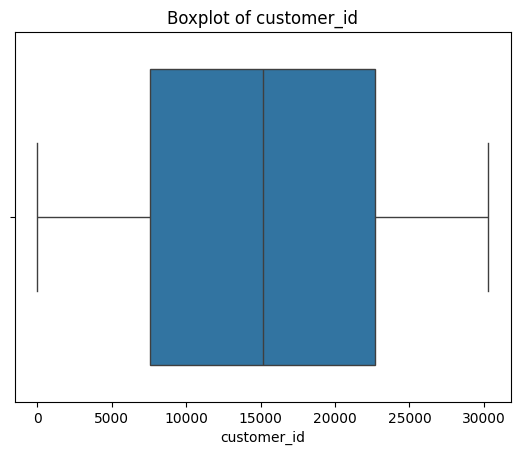

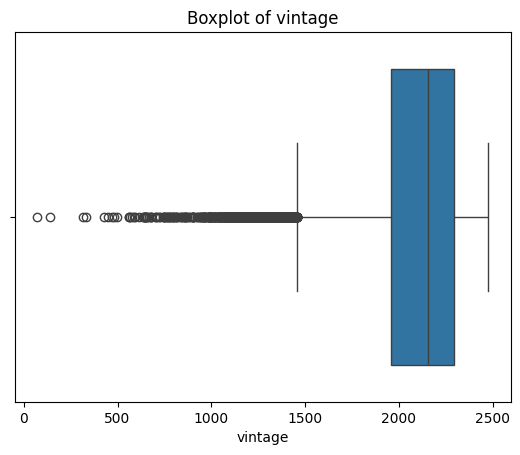

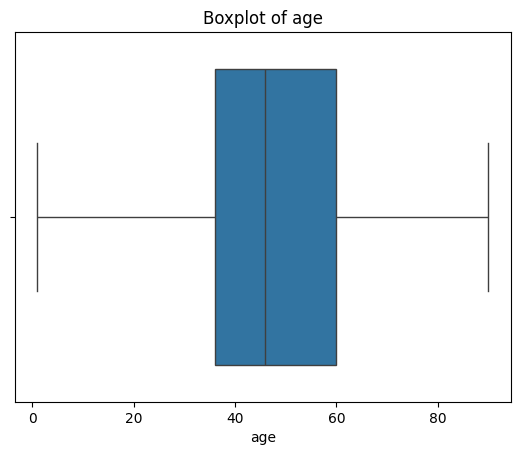

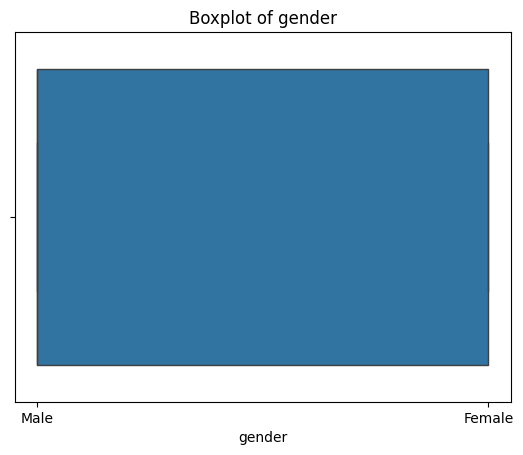

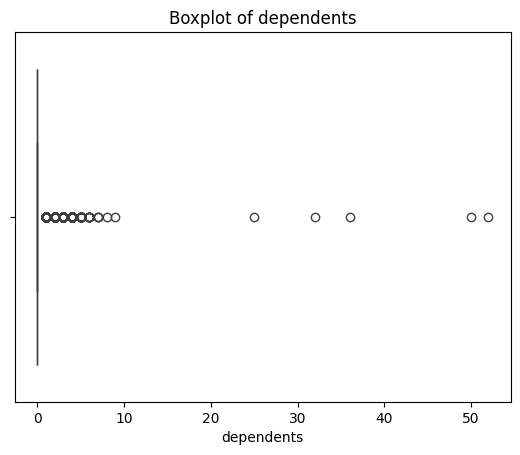

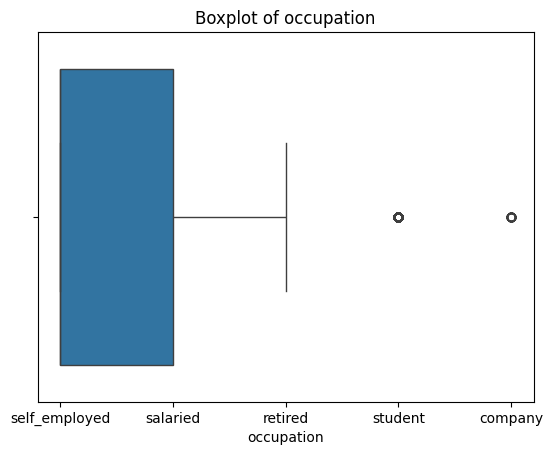

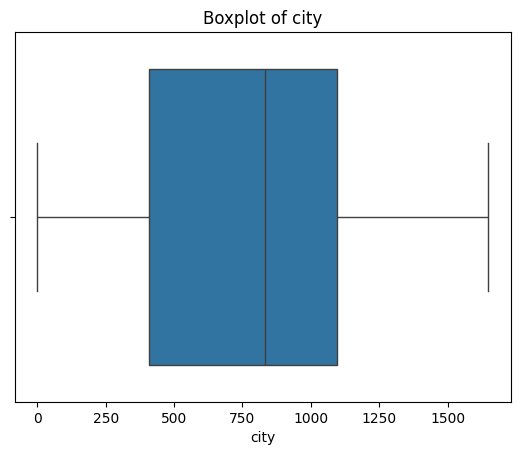

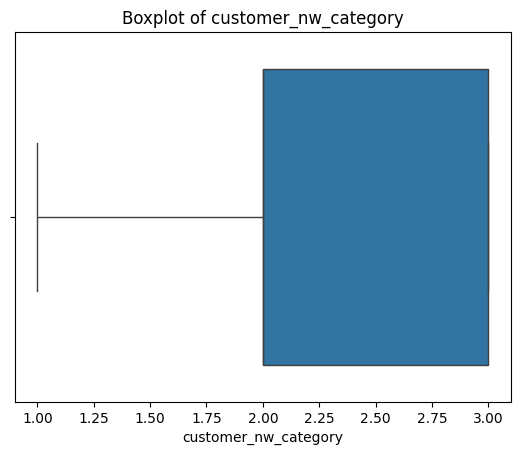

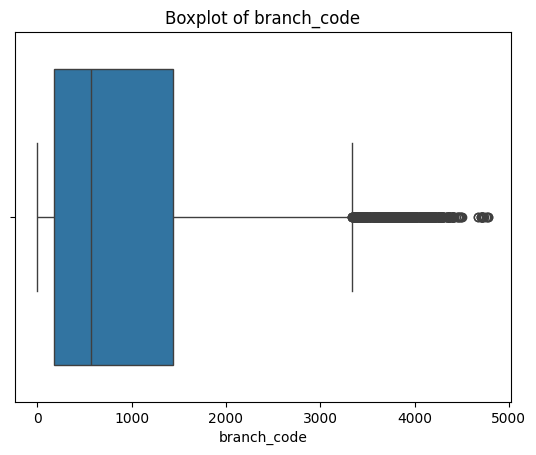

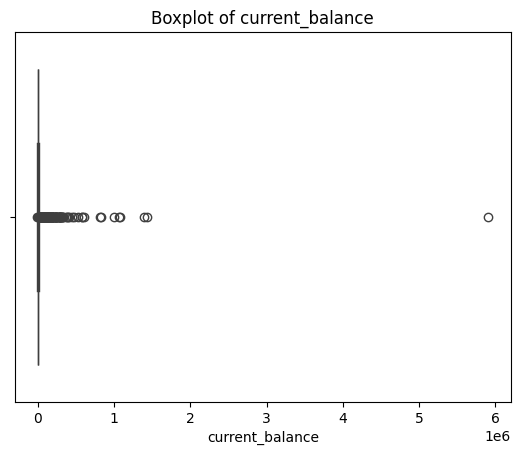

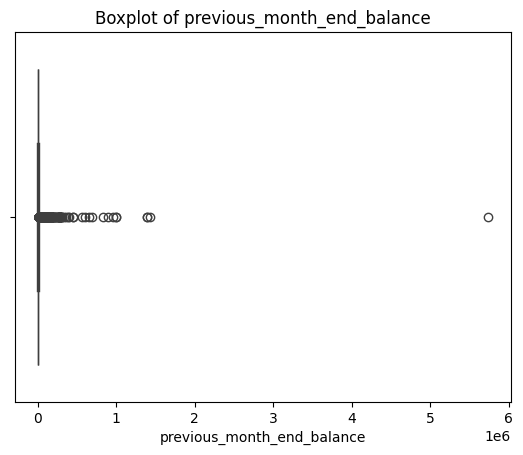

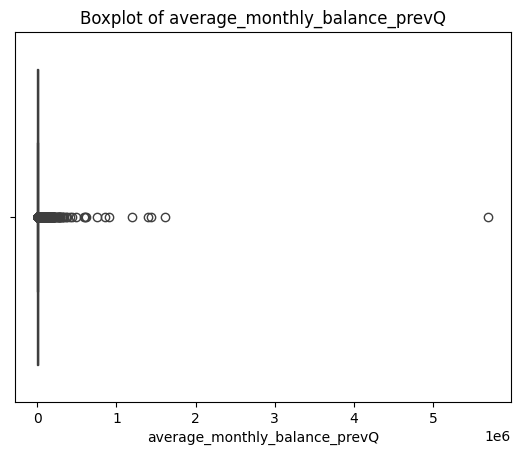

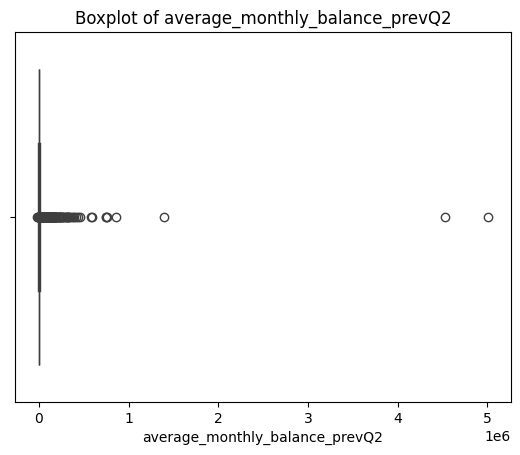

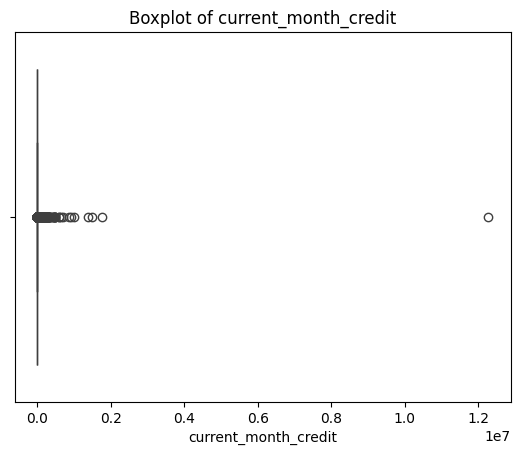

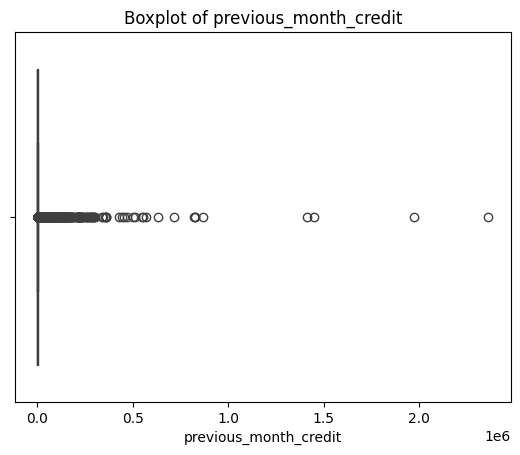

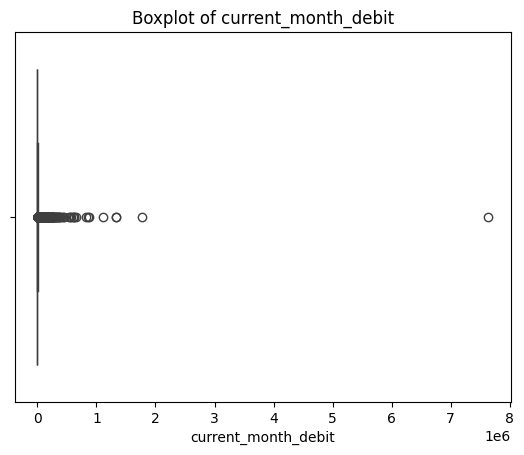

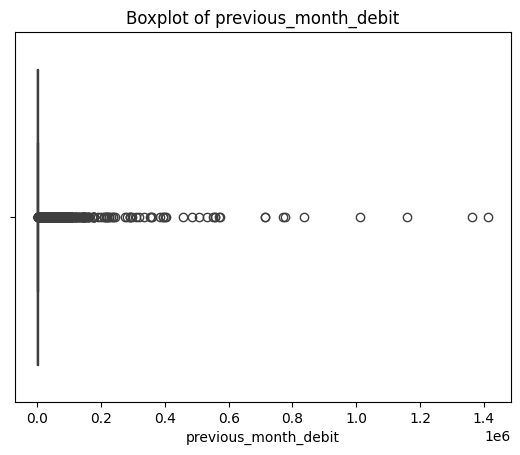

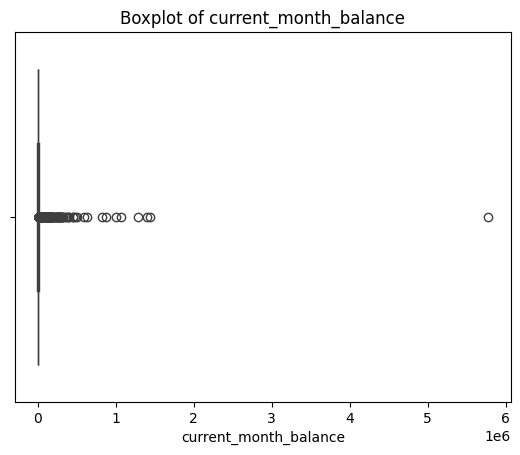

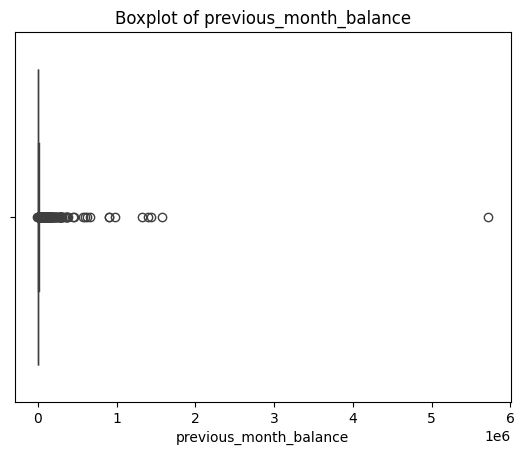

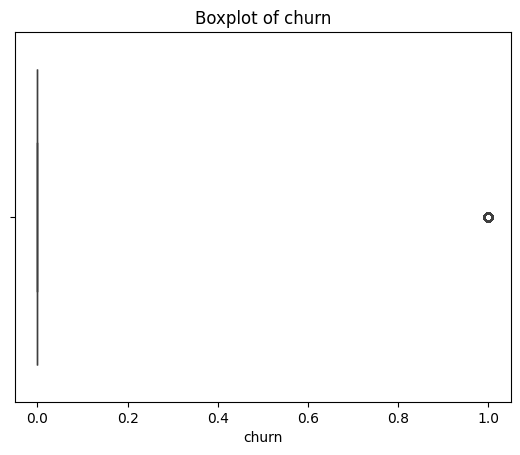

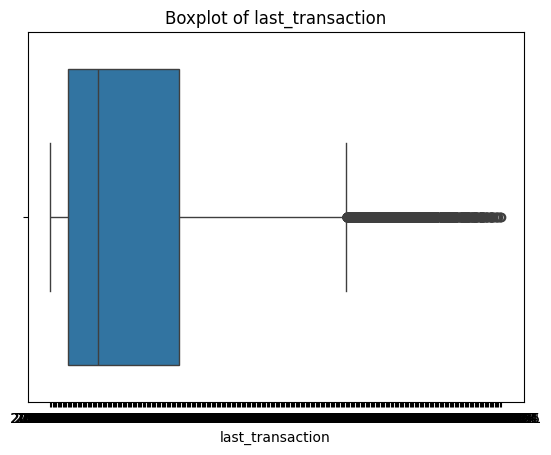

In [9]:
def plot_outliers(data):
  """
  This function plots the outliers for each column in a DataFrame.

  Args:
    data: A Pandas DataFrame.
  """
  for column in data.columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Use the function
plot_outliers(dataset)


In [10]:
dataset.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [11]:
dataset.occupation

0        self_employed
1        self_employed
2             salaried
3        self_employed
4        self_employed
             ...      
28377          student
28378    self_employed
28379         salaried
28380    self_employed
28381          student
Name: occupation, Length: 28382, dtype: object

In [16]:
dataset.groupby('occupation')['churn'].value_counts()

occupation     churn
company        0           36
               1            4
retired        0         1719
               1          305
salaried       0         5557
               1         1147
self_employed  0        14009
               1         3467
student        0         1734
               1          324
Name: churn, dtype: int64

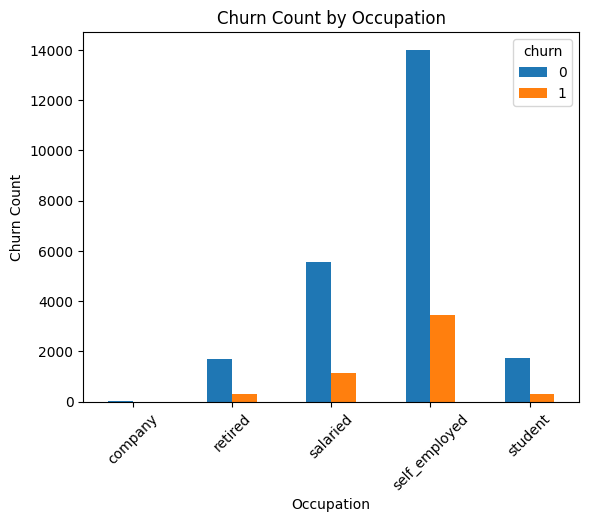

In [19]:
dataset.groupby('occupation')['churn'].value_counts().unstack().plot(kind='bar')

plt.title('Churn Count by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Churn Count')
plt.xticks(rotation=45)
plt.show()


In [83]:
dataset.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
dependents                          0
occupation                          0
city                              803
customer_nw_category                0
branch_code                         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
last_transaction                    0
gender_Female                       0
gender_Male                         0
dtype: int64

In [31]:
imputer_numb = SimpleImputer( strategy= 'most_frequent')

In [38]:
X = dataset['dependents'].values.reshape(-1, 1)


In [39]:
dataset['dependents'] = imputer_numb.fit_transform(X)

In [42]:
dataset['dependents'].isnull().sum()

0

In [67]:
dataset.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
dependents                          0
occupation                         80
city                              803
customer_nw_category                0
branch_code                         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
last_transaction                    0
gender_Female                       0
gender_Male                         0
dtype: int64

In [66]:
dataset = pd.get_dummies(dataset, columns=['gender'])
dataset.head()

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,gender_Female,gender_Male
0,1,2101,66,0.0,self_employed,187.0,2,755,1458.71,1458.71,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,0,1
1,2,2348,35,0.0,self_employed,NaN,2,3214,5390.37,8704.66,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01,0,1
2,4,2194,31,0.0,salaried,146.0,2,41,3913.16,5815.29,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,0,1
3,5,2329,90,0.0,self_employed,1020.0,2,582,2291.91,2291.91,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06,0,0
4,6,1579,42,2.0,self_employed,1494.0,3,388,927.72,1401.72,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,0,1


In [80]:
imputer = SimpleImputer(missing_values = pd.NA, strategy= 'most_frequent')


In [78]:
Oc = dataset['occupation'].values.reshape(-1,1)

In [81]:
dataset['occupation'] = imputer.fit_transform(Oc)

In [82]:
dataset.head(15)

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,gender_Female,gender_Male
0,1,2101,66,0.0,self_employed,187.0,2,755,1458.71,1458.71,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,0,1
1,2,2348,35,0.0,self_employed,NaN,2,3214,5390.37,8704.66,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01,0,1
2,4,2194,31,0.0,salaried,146.0,2,41,3913.16,5815.29,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,0,1
3,5,2329,90,0.0,self_employed,1020.0,2,582,2291.91,2291.91,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06,0,0
4,6,1579,42,2.0,self_employed,1494.0,3,388,927.72,1401.72,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,0,1
5,7,1923,42,0.0,self_employed,1096.0,2,1666,15202.20,16059.34,...,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01,1,0
6,8,2048,72,0.0,retired,1020.0,1,1,7006.93,7714.19,...,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24,0,1
7,9,2009,46,0.0,self_employed,623.0,2,317,10096.58,8519.53,...,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12,0,1
8,10,2053,31,0.0,salaried,1096.0,2,4110,1355.86,1355.86,...,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12,0,1
9,11,2295,40,3.0,self_employed,1020.0,2,38,4957.95,4244.38,...,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31,0,1


In [84]:
city = dataset['city'].values.reshape(-1,1)

In [86]:
dataset['city'] = imputer.fit_transform(city)

In [87]:
dataset.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
gender_Female                     0
gender_Male                       0
dtype: int64

In [88]:
dataset = pd.get_dummies(dataset, columns=['occupation'])
dataset.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,previous_month_balance,churn,last_transaction,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,...,1458.71,0,2019-05-21,0,1,0,0,0,1,0
1,2,2348,35,0.0,1020.0,2,3214,5390.37,8704.66,7799.26,...,8787.61,0,2019-11-01,0,1,0,0,0,1,0
2,4,2194,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,...,5070.14,0,NaT,0,1,0,0,1,0,0
3,5,2329,90,0.0,1020.0,2,582,2291.91,2291.91,2084.54,...,1669.79,1,2019-08-06,0,0,0,0,0,1,0
4,6,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,...,1677.16,1,2019-11-03,0,1,0,0,0,1,0


In [89]:
dataset.drop(columns=['customer_id','last_transaction'],inplace=True)

In [90]:
df = dataset.copy()
df.head(10)

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2348,35,0.0,1020.0,2,3214,5390.37,8704.66,7799.26,12419.41,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,2194,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,2329,90,0.0,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,...,1157.15,1677.16,1,0,1,0,0,0,1,0
5,1923,42,0.0,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,...,15719.44,15349.75,0,1,0,0,0,0,1,0
6,2048,72,0.0,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,...,7076.06,7755.98,0,0,1,0,1,0,0,0
7,2009,46,0.0,623.0,2,317,10096.58,8519.53,6511.82,16314.17,...,8563.84,5317.04,0,0,1,0,0,0,1,0
8,2053,31,0.0,1096.0,2,4110,1355.86,1355.86,1702.44,1126.13,...,1183.45,1857.42,0,0,1,0,0,1,0,0
9,2295,40,3.0,1020.0,2,38,4957.95,4244.38,2168.53,1864.33,...,1823.16,2416.69,0,0,1,0,0,0,1,0


In [95]:
X = df.drop(['churn'], axis=1)
y = df['churn']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=0)

In [106]:
scaler = MinMaxScaler()

In [107]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

In [110]:
logreg = LogisticRegressionCV(cv=10,random_state=0)

In [111]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

LogisticRegressionCV(cv=10, random_state=0)

In [112]:
predict = logreg.predict(X_test)

In [113]:
matris = confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      5794
         1.0       0.62      0.09      0.15      1302

    accuracy                           0.82      7096
   macro avg       0.72      0.54      0.53      7096
weighted avg       0.79      0.82      0.76      7096



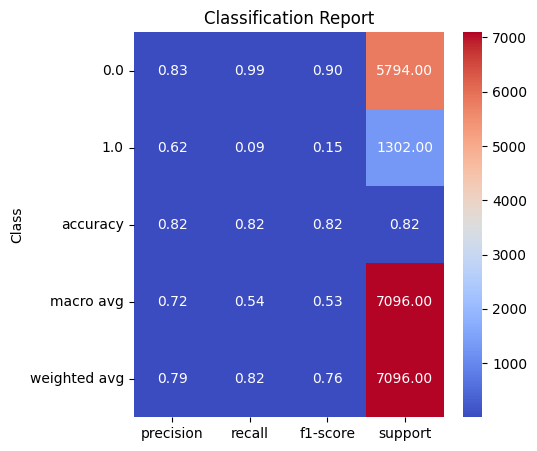

In [118]:

report = classification_report(y_test, predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.index.name = 'Class'

fig, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(report_df, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
plt.title('Classification Report')
plt.show()
